Для начала введем данные выборки (5 вариант)


In [1]:
import matplotlib.pylab as plt
import numpy as np

inp = [20, 26, 32, 34, 26, 28, 22, 30, 17, 24, 30, 28, 18, 22, 24, 26, 34, 28, 22, 20, 34, 24, 28, 20, 32, 17, 22, 24,
       26, 30, 30, 22, 26, 35, 28, 24, 30, 32, 28, 18, 20, 30, 17, 24, 32, 28, 22, 26, 24, 30, 34, 26, 24, 28, 22, 30,
       35, 32, 20, 17, 28, 22, 36, 30, 20, 26, 28, 23, 24, 32, 20, 26, 30, 24, 32, 17, 22, 28, 35, 26, 28, 35, 32, 22,
       26, 24, 26, 24, 30, 24, 18, 24, 26, 28, 35, 30, 26, 22, 26, 28]
n = len(inp)


Отсортируем выборку, создадим словари с вероятностями для каждого значения выборки

In [2]:
inp_sorted = sorted(inp)
func_variety_map = {}
variety_map = {}
sum = 0
for item in inp_sorted:
    if func_variety_map.get(item):
        func_variety_map[item] += 1
    else:
        func_variety_map[item] = 1
    sum += item
prev = 0.0
map_sorted = {k: v for k, v in sorted(func_variety_map.items(), key=lambda item: item[1])}
for item in sorted(func_variety_map):
    variety_map[item] = float(func_variety_map[item]) / n
    func_variety_map[item] = variety_map[item] + prev
    prev = func_variety_map[item]
variety_sorted = {k: v for k, v in sorted(func_variety_map.items(), key=lambda item: item[1])}

Теперь создадим графики по полученным данным

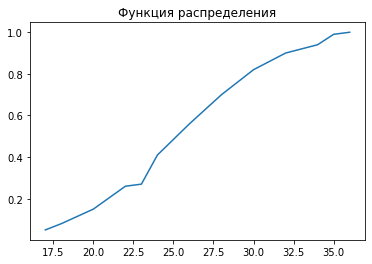

In [3]:
lists = sorted(func_variety_map.items())
x, y = zip(*lists) 
plt.title("Функция распределения")
plt.plot(x, y)
plt.show()

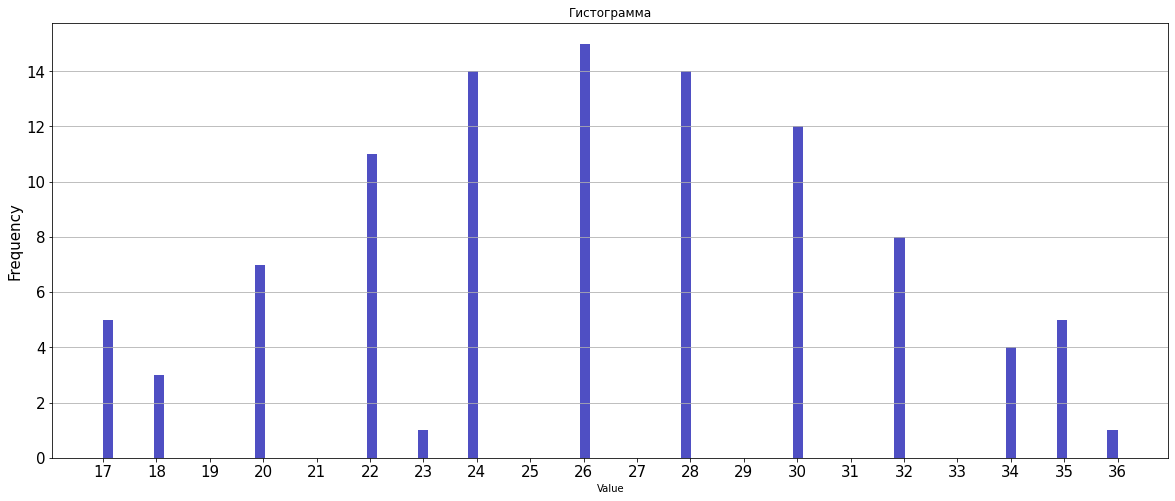

In [4]:
plt.figure(figsize=[20, 8])
plt.title("Гистограмма")
n1, bins, patches = plt.hist(x=inp_sorted, bins=n, color='#0504aa', alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value', fontsize=10)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(np.arange(min(x), max(x) + 1, 1.0), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

Теперь посчитаем Среднее значение выборки:

In [5]:
medium = sum / n
print(medium)


26.25


Дисперсию:

In [6]:
dispersion = 0
for item in inp:
    dispersion += (item - medium) ** 2
dispersion /= n
print(dispersion)

23.8075


Стандартную ошибку:

In [7]:
mistake = np.sqrt(dispersion/n)
print(mistake)

0.48792929815701785


Моду:

In [8]:
mode = [*map_sorted][len(map_sorted)-1]
print(mode)

26


Первый, второй и третий квартили (медиана - второй квартиль): 

In [9]:
for item in func_variety_map:
    if func_variety_map[item]>=0.25:
        first = item
        break
for item in func_variety_map:
    if func_variety_map[item]>=0.5:
        median = item
        break
for item in func_variety_map:
    if func_variety_map[item]>=0.75:
        third = item
        break
print(first, median, third)



22 26 30


Ящик с усами:

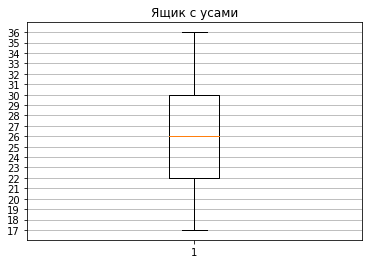

In [10]:
plt.title("Ящик с усами")
plt.boxplot(inp)
plt.yticks(np.arange(min(x), max(x) + 1, 1.0), fontsize=10)
plt.grid(axis='y', alpha=1)
plt.show()

Стандартную ошибку:

In [11]:
standard_deviation = np.sqrt(dispersion)
print(standard_deviation)

4.879292981570178


Эксцесс:

In [12]:
fourth_moment = 0
for item in inp:
    fourth_moment+= np.power((item-medium),4)
fourth_moment/=n
excess = (fourth_moment / np.power(standard_deviation,4)) - 3
print(excess)

-0.7193256087063529


Ассиметрию:

In [13]:
third_moment = 0
for item in inp:
    third_moment+= np.power((item-medium),2)
third_moment/=n
assym = (third_moment / np.power(standard_deviation,3))
print(assym)

0.204947725782639


Минимум и максимум выборки:

In [14]:
min = inp_sorted[0]
max = inp_sorted[n-1]
print(min, max)


17 36
